In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns
from tkinter import *
from tkinter import messagebox
from tkinter import ttk
import sys 
import urllib
import urllib.request
import pickle
import os

**Read the dataset**

In [2]:
df = pd.read_csv('dataset.csv')

**Dataset characteristics**

In [3]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [4]:
df["Disease"].value_counts()

Disease
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Aller

**Check for null and NaN values**

In [5]:
df.isna().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

**Remove the trailing space from the symptom columns and working with the null values**

In [6]:

def remove_space_between_words(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.strip().str.replace(" ", "_")
    return df
df = remove_space_between_words(df)
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal_infection,itching,skin_rash,nodal_skin_eruptions,dischromic__patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal_infection,skin_rash,nodal_skin_eruptions,dischromic__patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal_infection,itching,nodal_skin_eruptions,dischromic__patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal_infection,itching,skin_rash,dischromic__patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal_infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Symptom severity rank**

In [7]:
df1 = pd.read_csv('Symptom-severity.csv')
df1.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


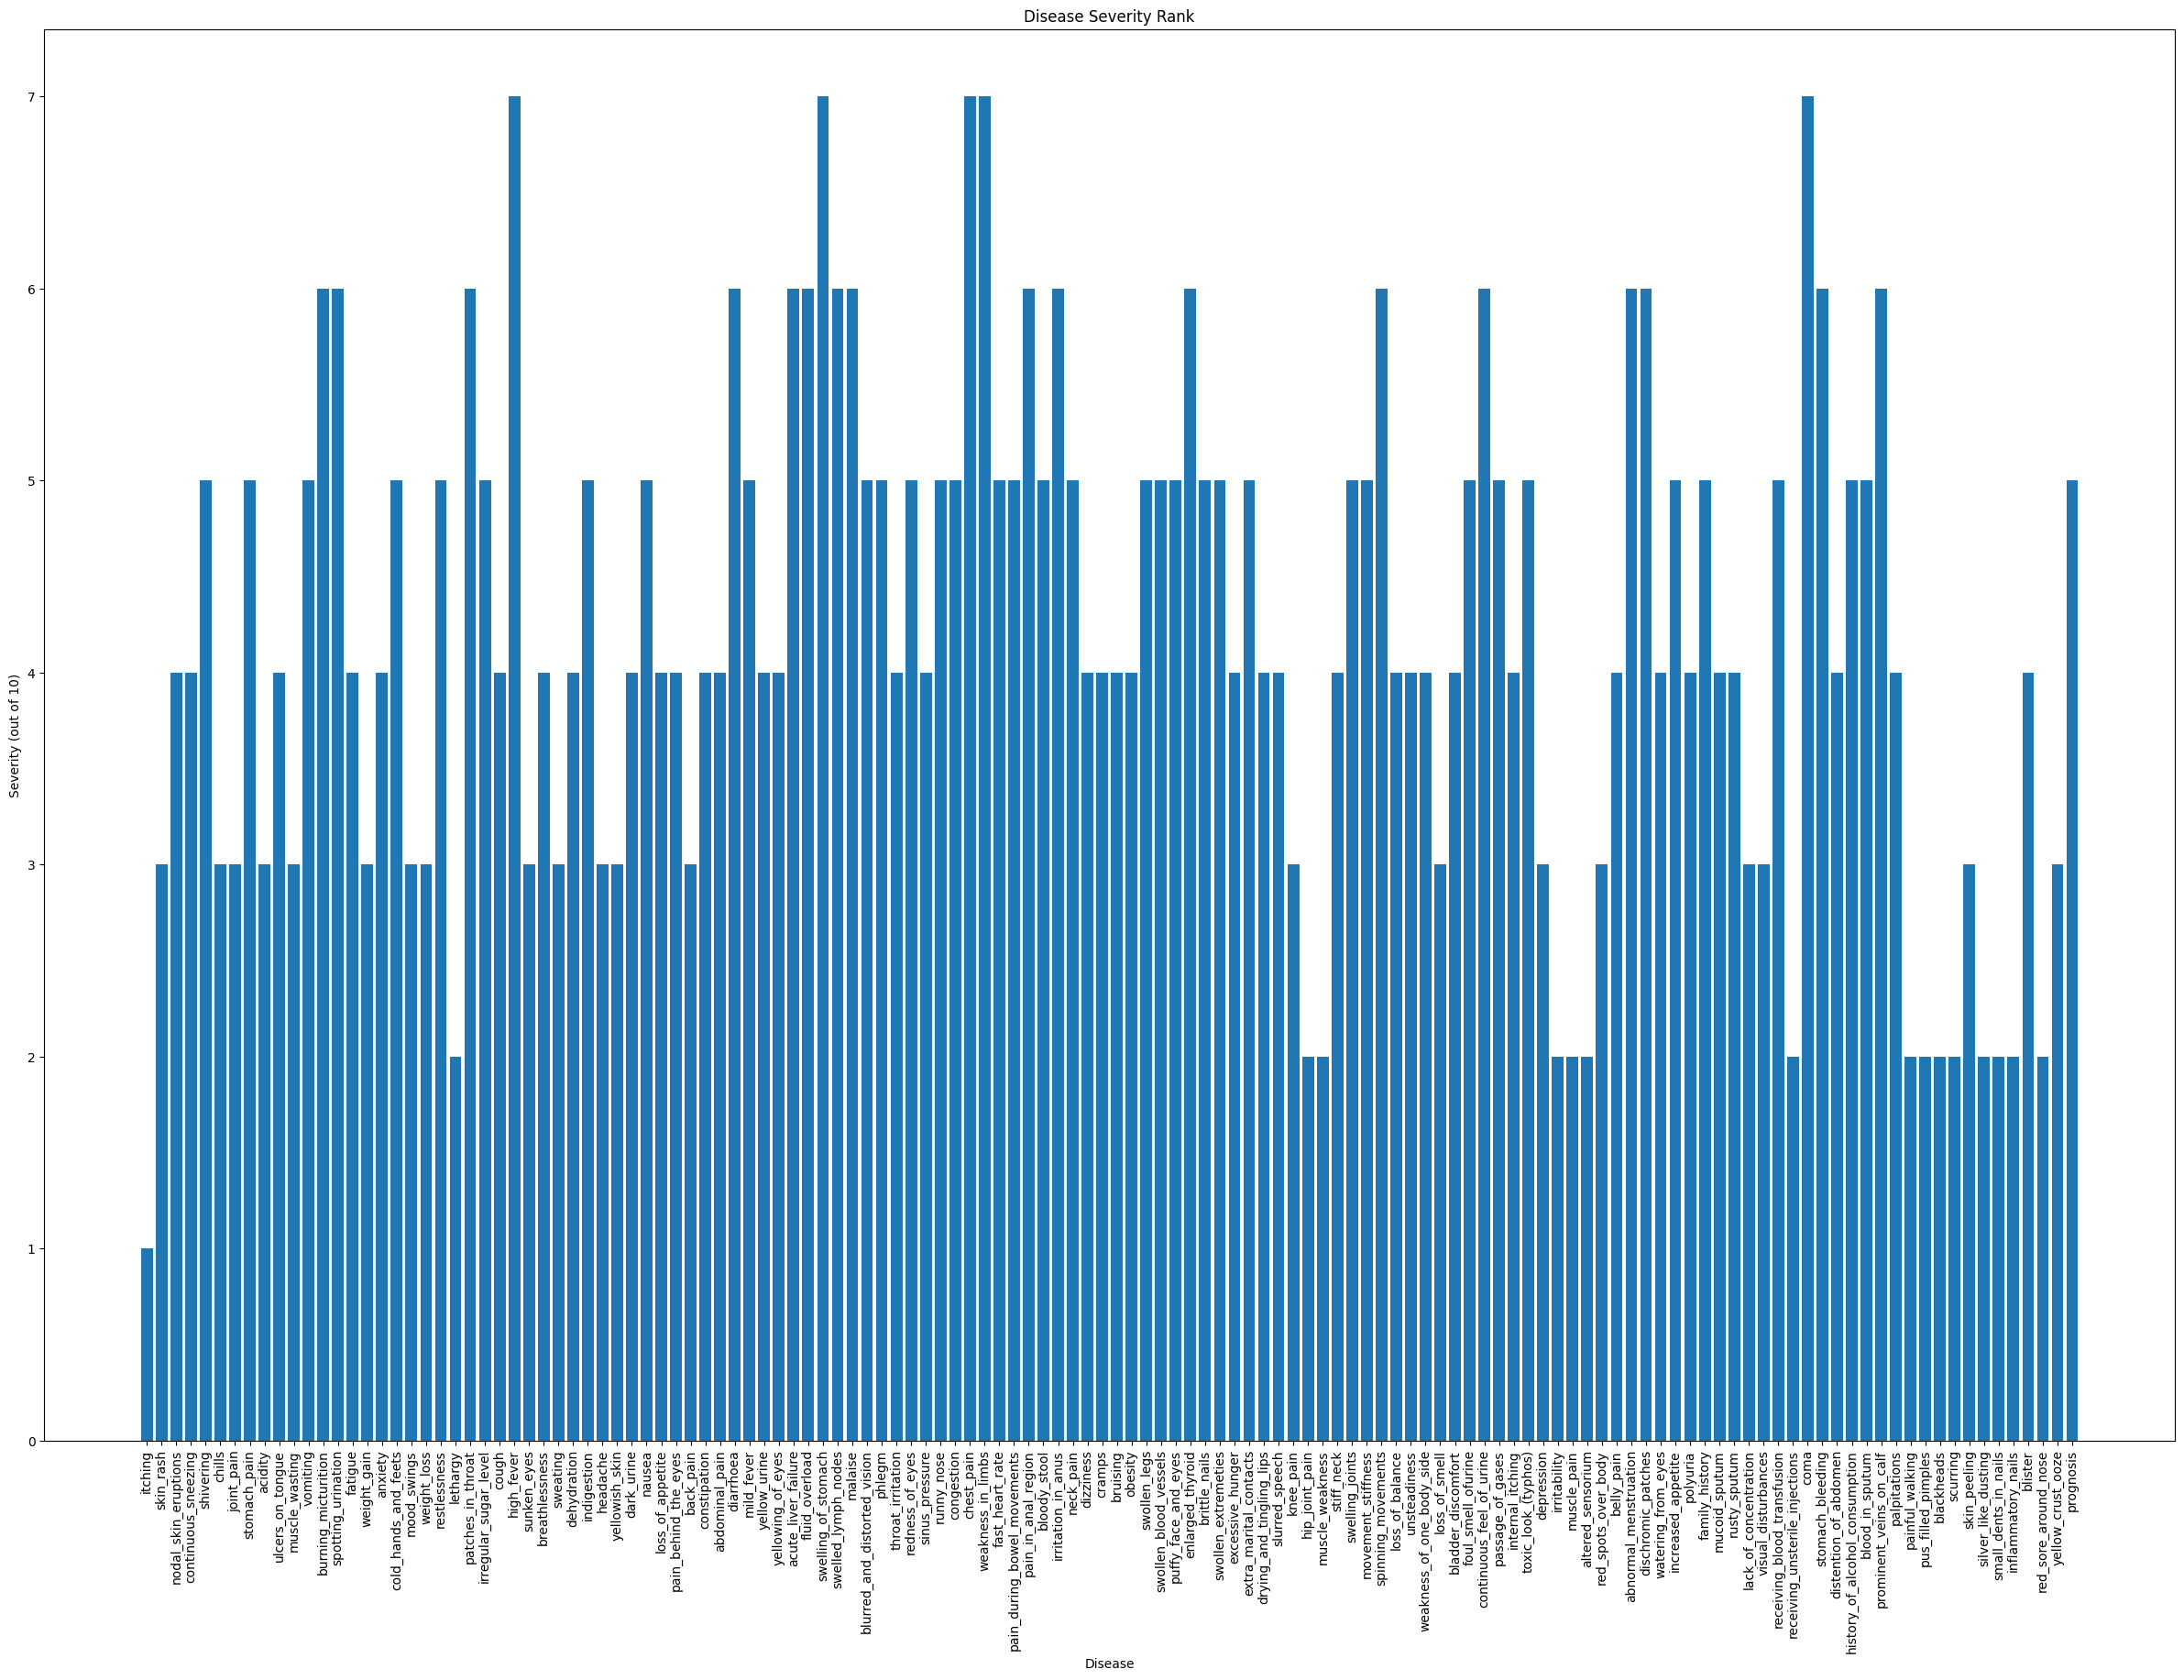

In [8]:
plt.figure(figsize=(30, 20))
plt.bar(df1['Symptom'], df1['weight'])
plt.xlabel('Disease')
plt.ylabel('Severity (out of 10)')
plt.title('Disease Severity Rank')
plt.xticks(rotation=90)
plt.show()

FINDING SYMPTOMS WITH HIGHEST SEVERITY

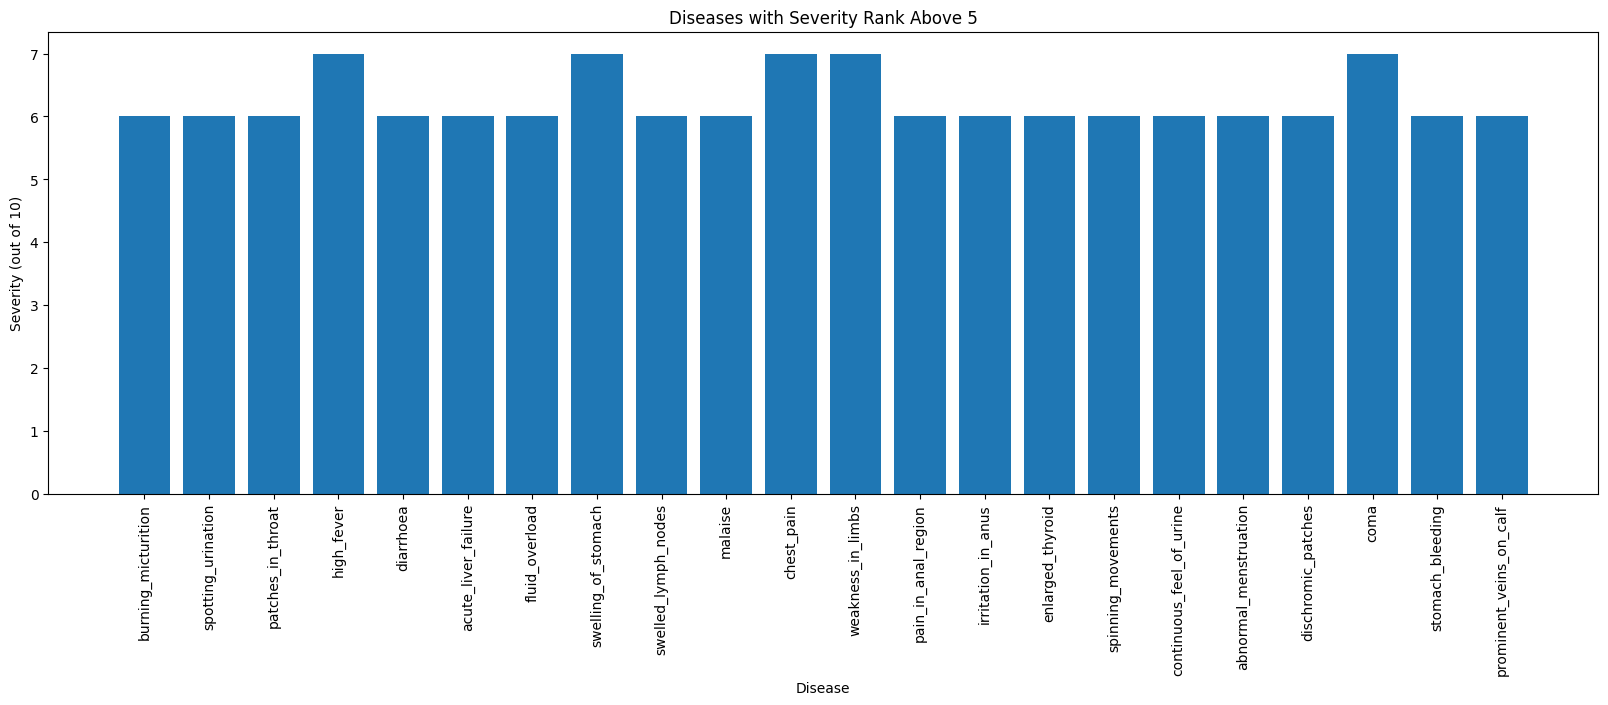

In [9]:
severity_limit = 5

# Filter the DataFrame based on the severity limit
selected_diseases = df1[df1['weight'] > severity_limit]

# Plot the selected diseases
plt.figure(figsize=(20, 6))
plt.bar(selected_diseases['Symptom'], selected_diseases['weight'])
plt.xlabel('Disease')
plt.ylabel('Severity (out of 10)')
plt.title(f'Diseases with Severity Rank Above {severity_limit}')
plt.xticks(rotation=90)
plt.show()

In [10]:
df1.info

<bound method DataFrame.info of                   Symptom  weight
0                 itching       1
1               skin_rash       3
2    nodal_skin_eruptions       4
3     continuous_sneezing       4
4               shivering       5
..                    ...     ...
128    inflammatory_nails       2
129               blister       4
130  red_sore_around_nose       2
131     yellow_crust_ooze       3
132             prognosis       5

[133 rows x 2 columns]>

**Encode symptoms in the data with the symptom rank**

In [11]:
# vals = df.values
# symptoms = df1['Symptom'].unique()

# for i in range(len(symptoms)):
#     vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
# d = pd.DataFrame(vals, columns=cols)
# d.head()

for i in df1.index:
    symptom = df1["Symptom"][i]
    severity_level = df1["weight"][i]
    df = df.replace(symptom,severity_level)

    
df = df.replace("foul_smell_of_urine", 5)
df = df.replace("dischromic__patches", 6)
df = df.replace("spotting__urination", 6)

**Assign symptoms with no rank to zero**

In [12]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal_infection,1,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal_infection,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal_infection,1,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal_infection,1,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal_infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Check if entire columns have zero values so we can drop those values**

In [13]:
(df.columns == 0).all()

False

**Get the names of diseases from data**

In [14]:
df['Disease'].unique()

array(['Fungal_infection', 'Allergy', 'GERD', 'Chronic_cholestasis',
       'Drug_Reaction', 'Peptic_ulcer_diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial_Asthma', 'Hypertension', 'Migraine',
       'Cervical_spondylosis', 'Paralysis_(brain_hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken_pox', 'Dengue', 'Typhoid', 'hepatitis_A',
       'Hepatitis_B', 'Hepatitis_C', 'Hepatitis_D', 'Hepatitis_E',
       'Alcoholic_hepatitis', 'Tuberculosis', 'Common_Cold', 'Pneumonia',
       'Dimorphic_hemmorhoids(piles)', 'Heart_attack', 'Varicose_veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo)_Paroymsal__Positional_Vertigo', 'Acne',
       'Urinary_tract_infection', 'Psoriasis', 'Impetigo'], dtype=object)

**Select the features as symptoms column and label as Disease column**

In [15]:
data = df.iloc[:,1:].values
labels = df['Disease'].values


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

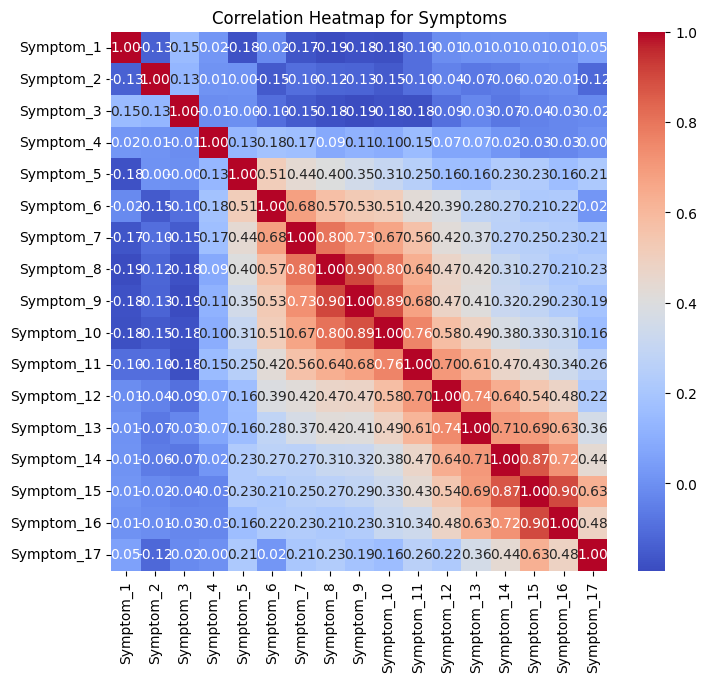

In [17]:


symptoms_data = df.iloc[:, 1:]  

# Compute the correlation matrix for symptoms
correlation_matrix = symptoms_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Symptoms")
plt.show()

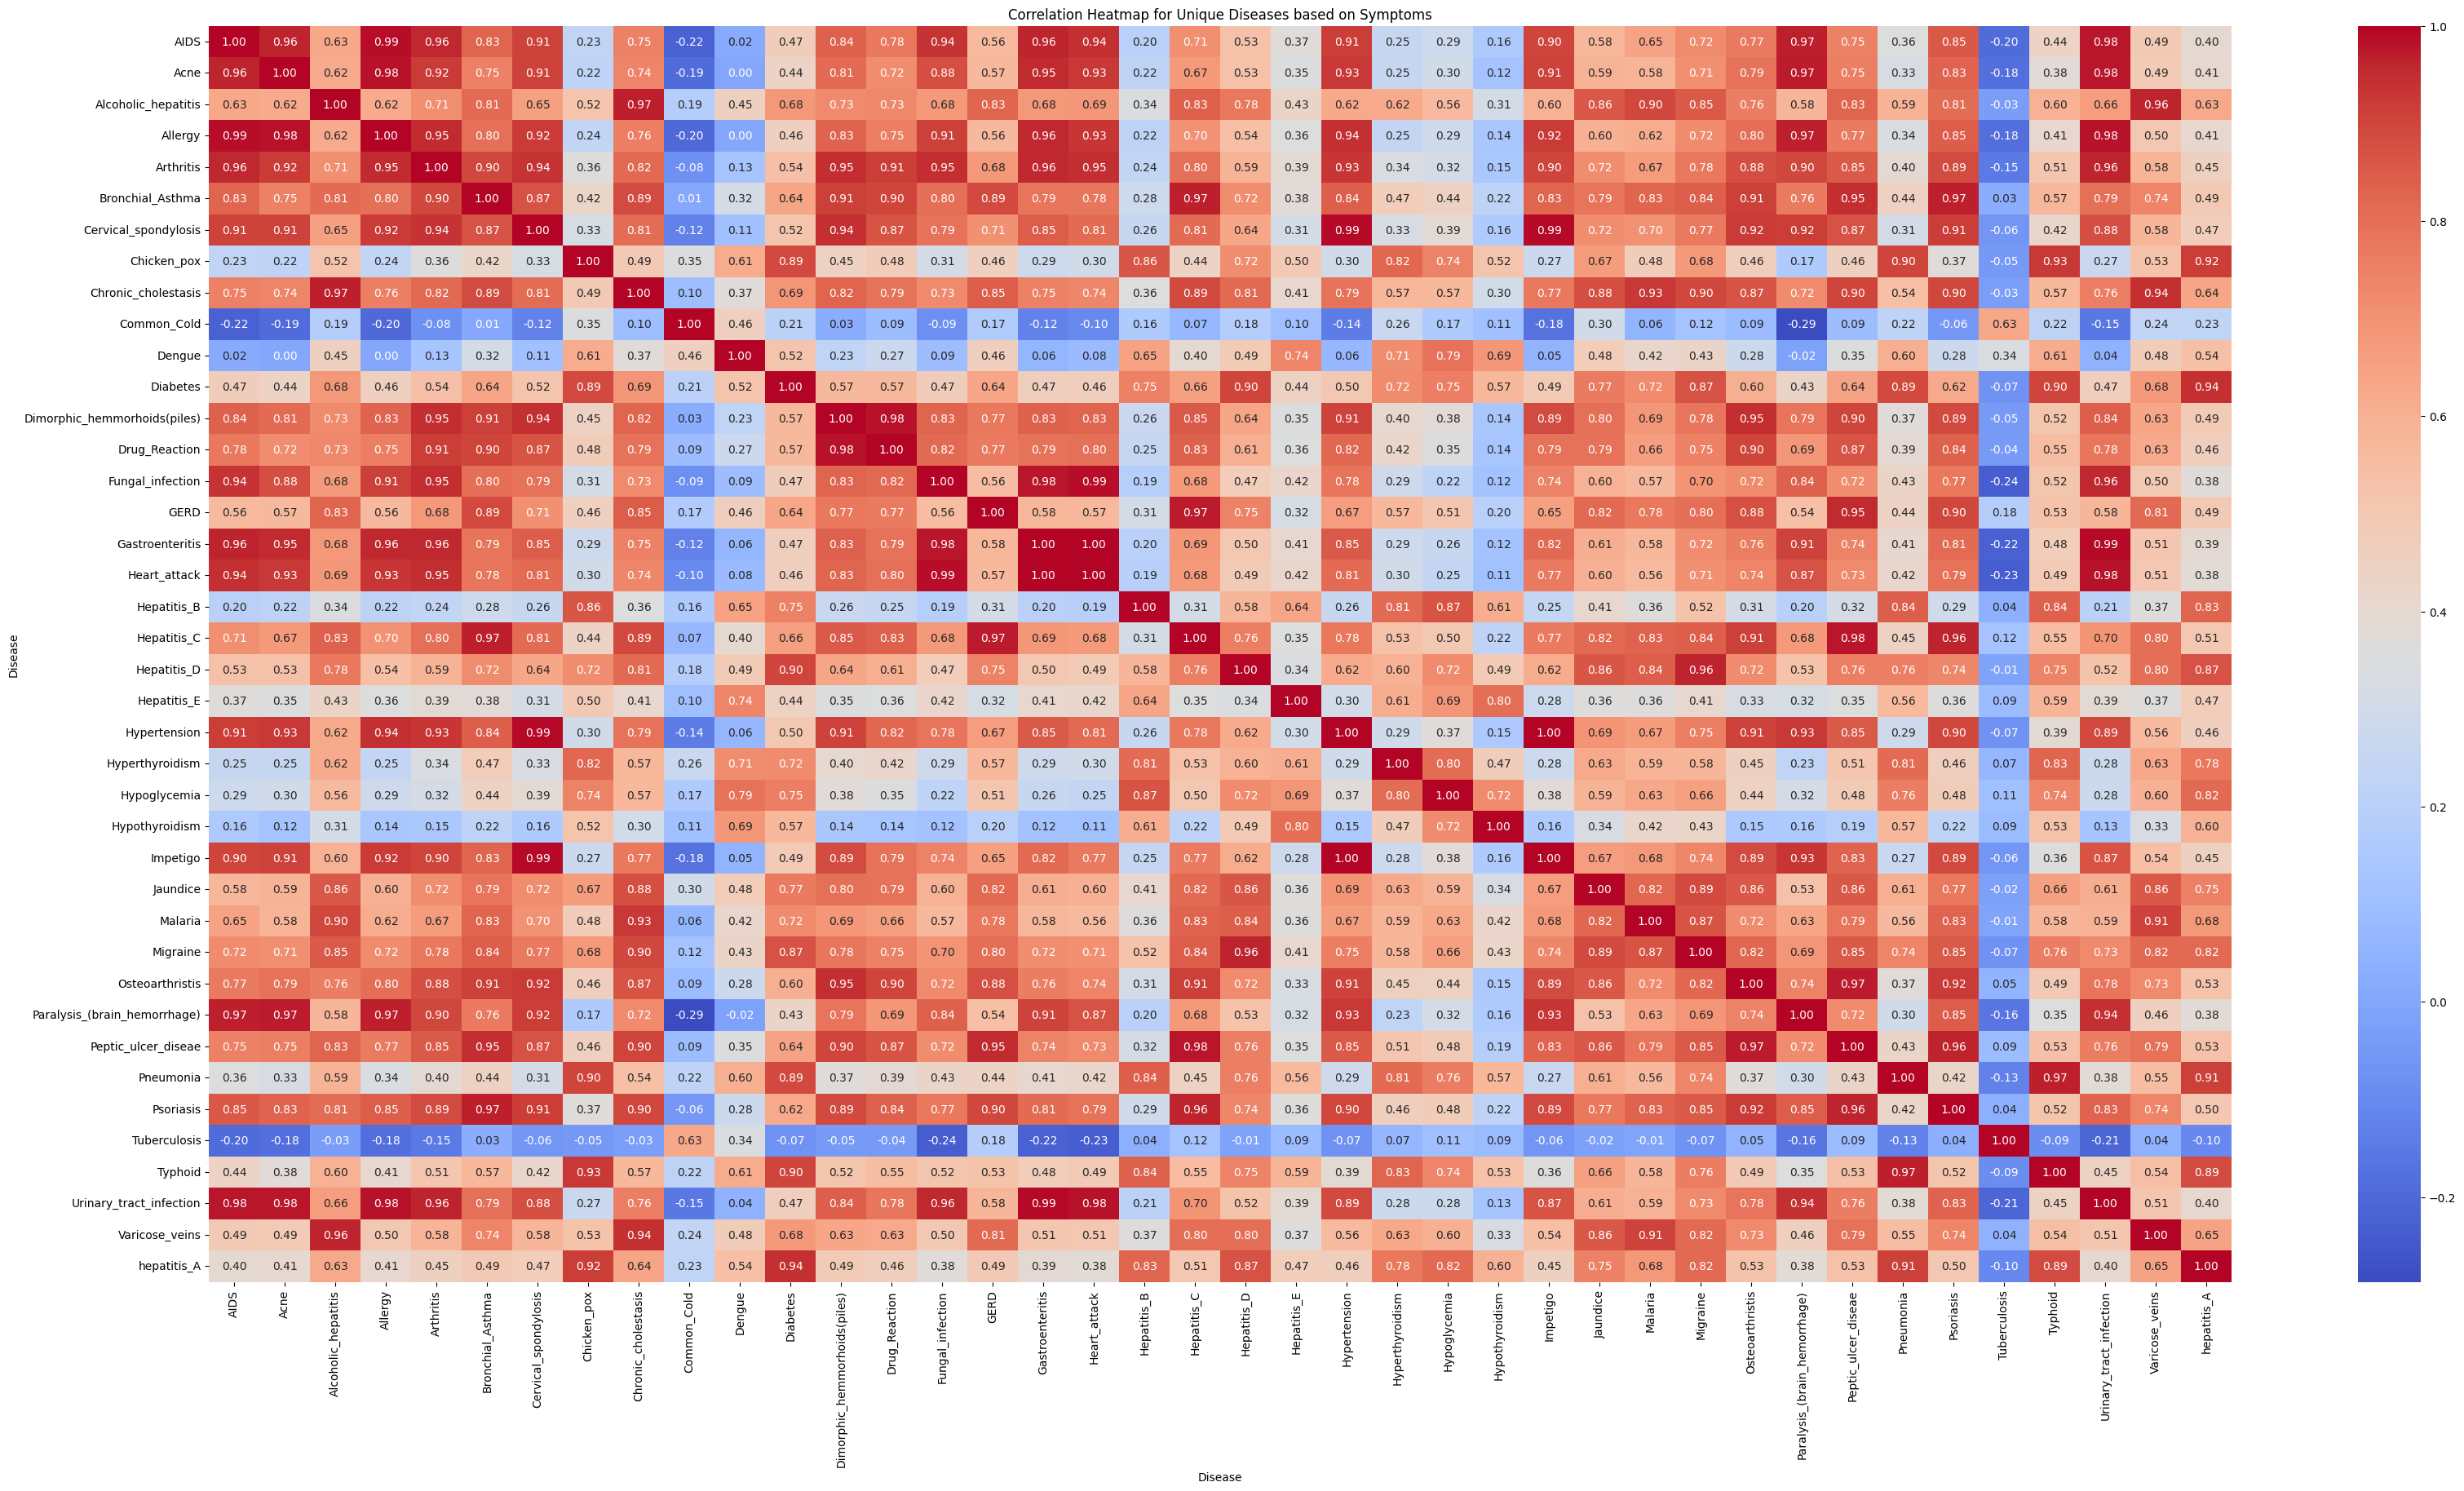

In [18]:
# Extract unique diseases
unique_diseases = df.iloc[:, 0].unique()

# Create a new DataFrame with unique diseases and symptoms
unique_data = df.groupby(df.columns[0]).max()

# Transpose the DataFrame so that diseases become rows and symptoms become columns
transposed_data = unique_data.transpose()

# Extract the diseases columns
diseases_data = transposed_data.iloc[:, 1:]  # Assuming that columns 1 onwards are diseases

# Convert the data types to numeric (assuming symptoms are currently in string format)
diseases_data = diseases_data.apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix for diseases
correlation_matrix_diseases = diseases_data.corr()

# Create a heatmap
plt.figure(figsize=(40, 20))
sns.heatmap(correlation_matrix_diseases, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Unique Diseases based on Symptoms")
plt.show()

**Split the data, labels with shuffle**

In [19]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.80)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


**Initialize and train a Random Forest Classifier**

In [20]:
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
###**Pickle load**

In [22]:
pickle.dump(model, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))

**Throw predictions**

In [23]:

y_pred = model.predict(x_test)
y_pred

array(['Pneumonia', 'Hypertension', 'Gastroenteritis', 'Hypothyroidism',
       'Drug_Reaction', 'Chronic_cholestasis', 'Drug_Reaction',
       'Hypoglycemia', 'Gastroenteritis', 'Dengue', 'Common_Cold',
       'Hepatitis_D', 'Migraine', 'Hypothyroidism', 'Hepatitis_E',
       'Urinary_tract_infection', 'Alcoholic_hepatitis', 'Hypothyroidism',
       'Urinary_tract_infection', 'Tuberculosis', 'Common_Cold',
       'Typhoid', 'Impetigo', 'Typhoid', 'Tuberculosis',
       'Cervical_spondylosis', 'Hypothyroidism', 'Hypertension',
       'Hepatitis_B', 'Acne', 'Jaundice', 'Migraine', 'Hypothyroidism',
       'Dengue', 'Hepatitis_D', 'Common_Cold', 'Hyperthyroidism',
       'Chronic_cholestasis', 'Common_Cold', 'Allergy',
       '(vertigo)_Paroymsal__Positional_Vertigo', 'Malaria',
       'Hepatitis_D', 'Varicose_veins', 'Hyperthyroidism',
       'Drug_Reaction', 'Jaundice', 'Arthritis', 'Psoriasis', 'Jaundice',
       'Hypertension', 'Hyperthyroidism', 'Pneumonia',
       'Chronic_cholesta

In [24]:
scores = cross_val_score(model, data, labels, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean accuracy: {:.2f}".format(scores.mean()))
print("Standard deviation: {:.2f}".format(scores.std()))

Cross-validation scores: [0.98678862 0.98272358 0.99390244 1.         1.        ]
Mean accuracy: 0.99
Standard deviation: 0.01


APPLYING RANDOM FOREST ALGORITHM

In [25]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
from sklearn.metrics import confusion_matrix

#calculating accuracy
accuracyrf = accuracy_score(y_test, y_pred)
precisionrf = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Random Forest")
print(f'Accuracy: {accuracyrf}')
print(f'Precision: {precisionrf}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(accuracy_score(y_test, y_pred,normalize=False))
print("Confusion matrix")
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

Random Forest
Accuracy: 0.9949186991869918
Precision: 0.9948259713011878
Recall: 0.9956321106989873
F1-Score: 0.9950303915512275
979
Confusion matrix
[[18  0  0 ...  0  0  0]
 [ 0 23  0 ...  0  0  0]
 [ 0  0 33 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 23]]


**Plot the confusion matrix for 25 diseases and calculate f1, accuracy**

F1-score% = 99.50303915512275 | Accuracy% = 99.49186991869918


<Axes: >

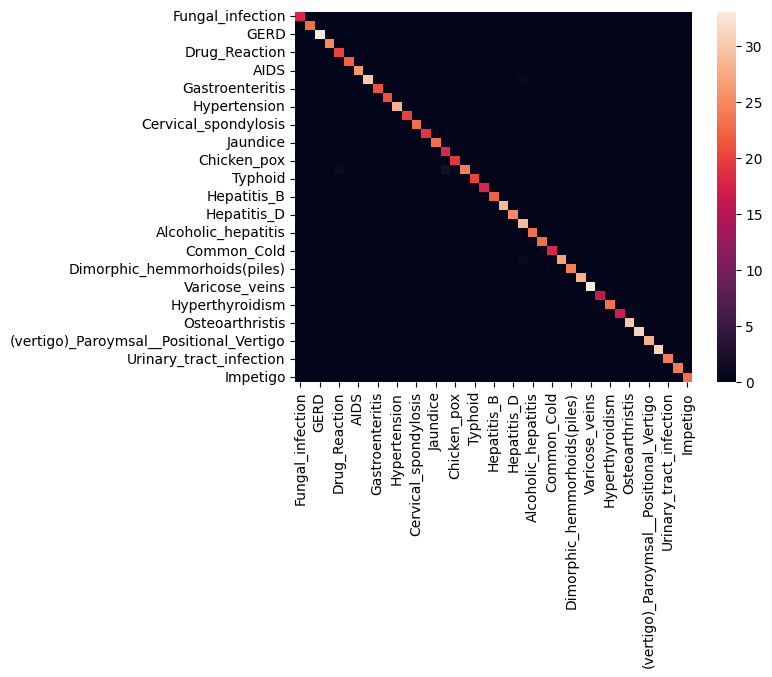

In [26]:
conf_mat = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, y_pred, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, y_pred)*100)
sns.heatmap(df_cm)

APPLYING DECISION TREE

In [28]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.80)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(3936, 17) (984, 17) (3936,) (984,)


Decision Tree
Accuracy: 0.991869918699187
Precision: 0.9934238132703909
Recall: 0.9923904246754054
F1-Score: 0.9924308254321069
976
Confusion matrix
[[29  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 20  0  0]
 [ 0  0  0 ...  0 25  0]
 [ 0  0  0 ...  0  0 27]]


<Axes: >

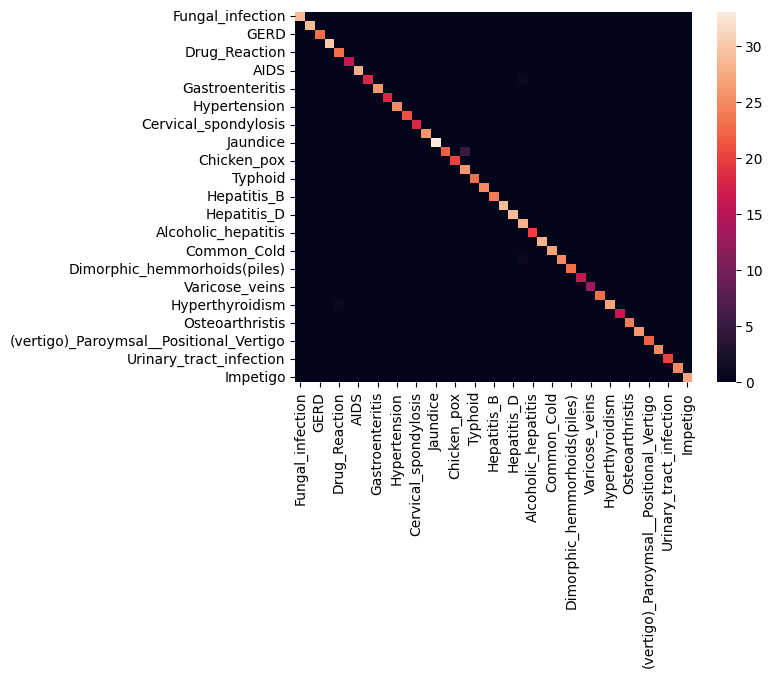

In [29]:
from sklearn.tree import DecisionTreeClassifier

dtm = DecisionTreeClassifier(random_state=42,)
dtm.fit(x_train,y_train)

ypreddtm = dtm.predict(x_test)

#calculating accuracy
accuracydt = accuracy_score(y_test, ypreddtm)
precisiondt = precision_score(y_test, ypreddtm, average='macro')
recall = recall_score(y_test, ypreddtm,average='macro')
f1 = f1_score(y_test, ypreddtm, average='macro')

print("Decision Tree")
print(f'Accuracy: {accuracydt}')
print(f'Precision: {precisiondt}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(accuracy_score(y_test, ypreddtm,normalize=False))
print("Confusion matrix")
conf_matrix=confusion_matrix(y_test,ypreddtm)
print(conf_matrix)

conf_mat = confusion_matrix(y_test, ypreddtm)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
sns.heatmap(df_cm)
    

In [30]:
scores = cross_val_score(dtm, data, labels, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

Cross-validation scores: [0.98678862 0.98272358 0.99390244 1.         1.        ]


APPLYING NAIVE BAYES ALGORITHM

c:\Users\nisha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gaussian NB
accuracy = 0.8739837398373984
precision = 0.8718975813403357
recall = 0.8725370222848537
f1 score = 0.863340828297065
Confusion matrix
[[27  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  1  0 ... 19  0  0]
 [ 0  0  0 ...  0 25  0]
 [ 0  0  0 ...  0  0 27]]


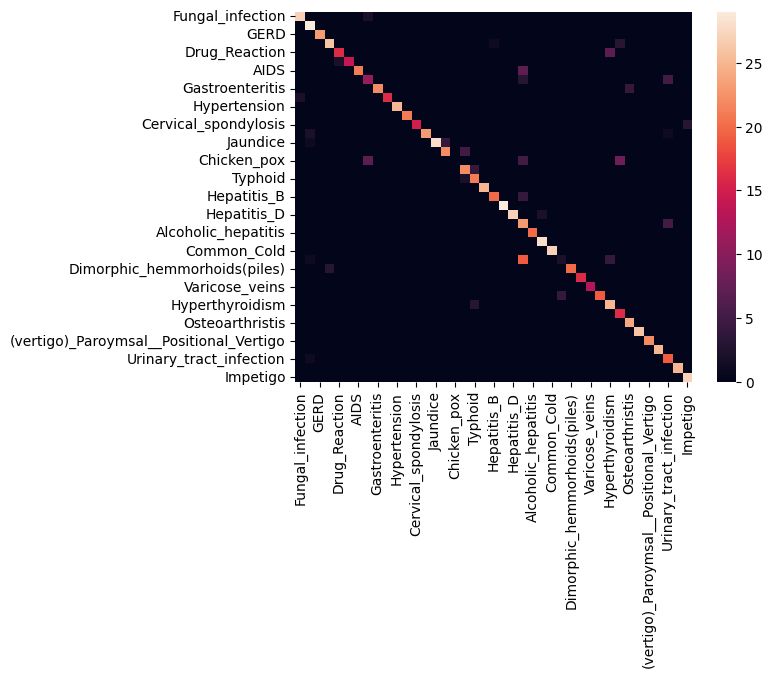

In [31]:
from sklearn.naive_bayes import GaussianNB

nbclass = GaussianNB()

nbclass.fit(x_train, y_train)

y_pred = nbclass.predict(x_test)
accuracynb = accuracy_score(y_test, y_pred)
precisionnb = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_score = f1_score(y_test, y_pred, average="macro")

print("Gaussian NB")
print("accuracy =", accuracynb)
print("precision =", precisionnb)
print("recall =", recall)
print("f1 score =", f1_score)

print("Confusion matrix")
conf_matrix = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(conf_matrix, index=df['Disease'].unique(), columns=df['Disease'].unique())
sns.heatmap(df_cm)
print(conf_matrix)

In [32]:
scores = cross_val_score(nbclass, data, labels, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

Cross-validation scores: [0.79674797 0.82317073 0.88617886 0.95121951 0.95121951]


APPLYING ADABOOST ALGORITHM

c:\Users\nisha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\nisha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoostClassifier
Accuracy: 0.8739837398373984
Precision: 0.8718975813403357
Recall: 0.8725370222848537
F1-Score: 0.9924308254321069
860
Confusion matrix
[[27  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  1  0 ... 19  0  0]
 [ 0  0  0 ...  0 25  0]
 [ 0  0  0 ...  0  0 27]]


<Axes: >

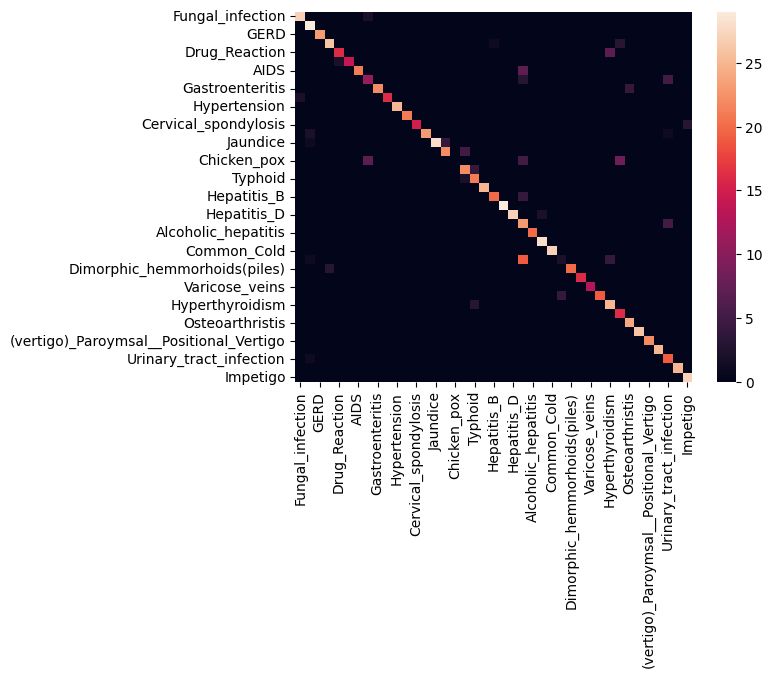

In [33]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier using Decision Trees as base learners
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)

# Train the model
adaboost_model.fit(x_train, y_train)

# Make predictions
adaboost_predictions = adaboost_model.predict(x_test)

# Evaluate the accuracy
accuracyad = accuracy_score(y_test, y_pred)
precisionad= precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred,average='macro')
# f1_score = f1_score(y_test, y_pred, average='macro')

print("AdaBoostClassifier")
print(f'Accuracy: {accuracyad}')
print(f'Precision: {precisionad}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(accuracy_score(y_test, y_pred,normalize=False))
print("Confusion matrix")
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

df_cm = pd.DataFrame(conf_matrix, index=df['Disease'].unique(), columns=df['Disease'].unique())
sns.heatmap(df_cm)

In [34]:
scores = cross_val_score(adaboost_model, data, labels, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

c:\Users\nisha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\nisha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\nisha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\nisha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\nisha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: Futu

Cross-validation scores: [0.07926829 0.07723577 0.08739837 0.09756098 0.09756098]


APPLYING SVM ALGORITHM


c:\Users\nisha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM
Accuracy: 0.8739837398373984
Precision: 0.8718975813403357
Recall: 0.8725370222848537
F1-Score: 0.9924308254321069
860
Confusion matrix
[[27  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  1  0 ... 19  0  0]
 [ 0  0  0 ...  0 25  0]
 [ 0  0  0 ...  0  0 27]]


<Axes: >

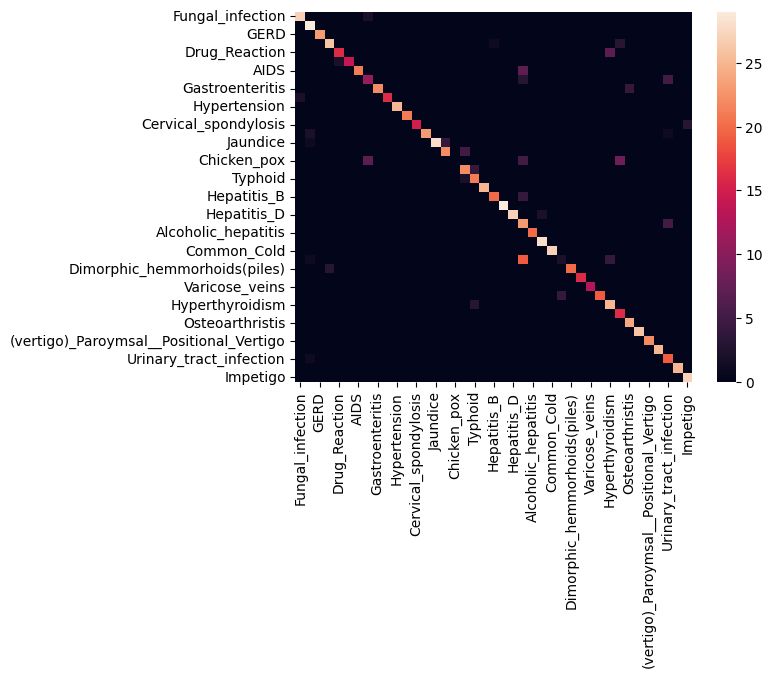

In [35]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svm_model.fit(x_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(x_test)

# Evaluate the accuracy
accuracysv = accuracy_score(y_test, y_pred)
precisionsv= precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred,average='macro')
# f1 = f1_score(y_test, y_pred, average='macro')

print("SVM")
print(f'Accuracy: {accuracysv}')
print(f'Precision: {precisionsv}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(accuracy_score(y_test, y_pred,normalize=False))
print("Confusion matrix")
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

df_cm = pd.DataFrame(conf_matrix, index=df['Disease'].unique(), columns=df['Disease'].unique())
sns.heatmap(df_cm)

In [36]:
scores = cross_val_score(svm_model, data, labels, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

Cross-validation scores: [0.94715447 0.94410569 0.98170732 1.         1.        ]


In [37]:
import joblib


In [39]:
file_path = 'model.pkl'
load_model = joblib.load(file_path)

In [40]:
symptoms_name = df1["Symptom"]

# taking symptoms randomly from the symptoms name list
num_elements = 14
random_elements = np.random.choice(symptoms_name, num_elements)
re =[random_elements]

# Now when we have the symptoms, we have to transform it to their correponding weights for our model
lent = len(random_elements)
n = 17-lent

for i in range (lent) :
    for j in range(len(df1["weight"])):
        if random_elements[i] == df1["Symptom"][j]:
            random_elements[i] = df1["weight"][j]

random_elements = np.pad(random_elements,(0,n), mode='constant',constant_values=0)
random_elements = random_elements.reshape(-1,1)
random_elements = random_elements.T
predictions = model.predict(random_elements)





In [43]:
discription = pd.read_csv('symptom_Description.csv')
precaution = pd.read_csv('symptom_precaution.csv')
discription_name = discription["Disease"]
precaution_name=precaution["Disease"]
index=0

# print (discription_name)

for i in range (len(discription_name)):
    if predictions == discription_name[i]:
        index = i
print (discription.loc[index])

for i in range (len(precaution_name)):
    if predictions == precaution_name[i]:
        index = i
     

print (precaution.loc[index])

Disease                                            Drug Reaction
Description    An adverse drug reaction (ADR) is an injury ca...
Name: 0, dtype: object
Disease                    Drug Reaction
Precaution_1             stop irritation
Precaution_2    consult nearest hospital
Precaution_3            stop taking drug
Precaution_4                   follow up
Name: 0, dtype: object


COMPARING THE ML ALGORITHMS USED


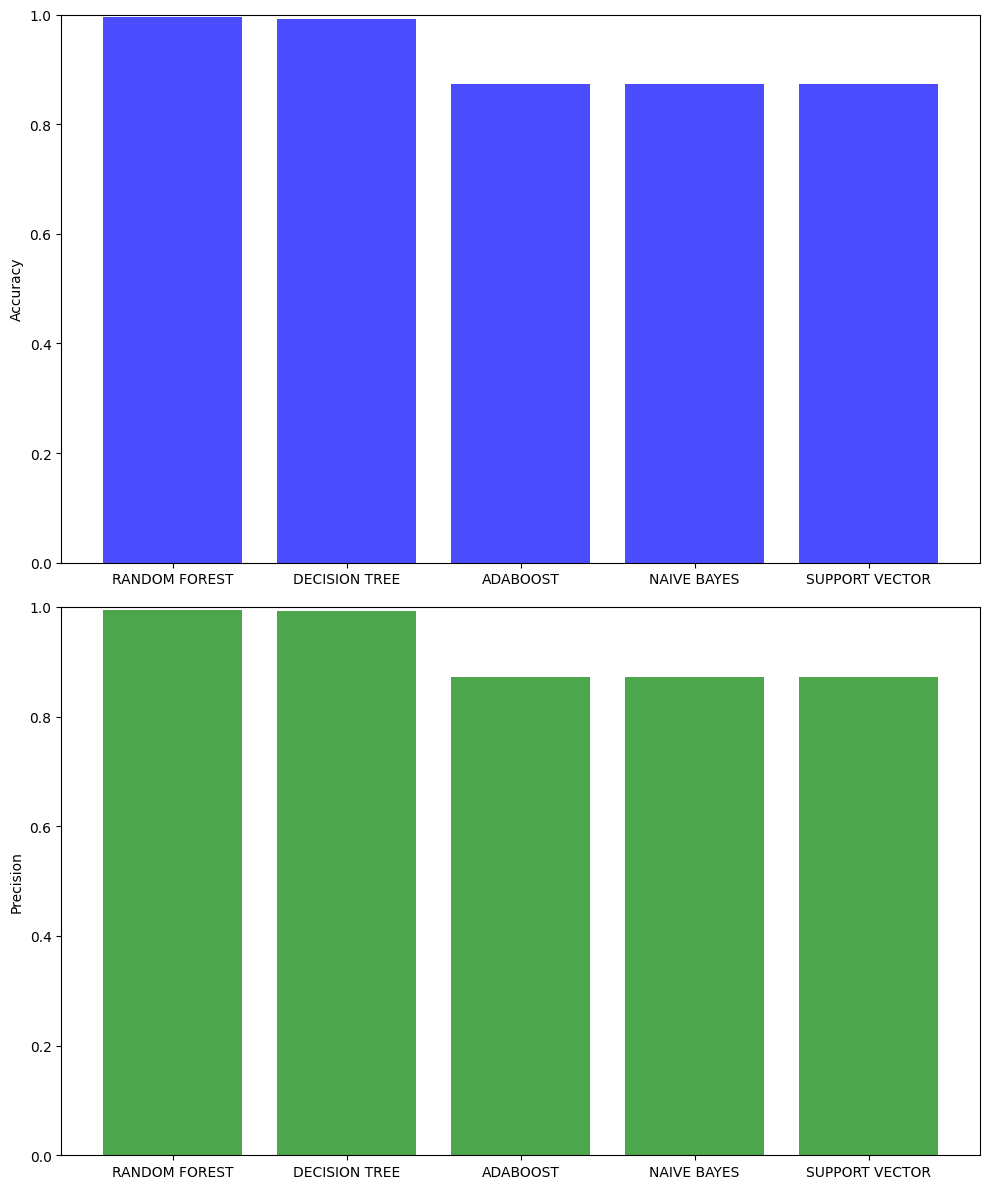

In [44]:
import matplotlib.pyplot as plt

models = ['RANDOM FOREST', 'DECISION TREE', 'ADABOOST', 'NAIVE BAYES', 'SUPPORT VECTOR']
accuracy_values = [accuracyrf, accuracydt, accuracyad,accuracynb,accuracysv]
precision_values = [precisionrf, precisiondt, precisionad,precisionnb,precisionsv]


# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Accuracy
ax[0].bar(models, accuracy_values, color='blue', alpha=0.7)
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0, 1)

# Precision
ax[1].bar(models, precision_values, color='green', alpha=0.7)
ax[1].set_ylabel('Precision')
ax[1].set_ylim(0, 1)

# Display the plot
plt.tight_layout()
plt.show()